In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# import tensorflow as tf
# import keras

In [3]:
data = pd.read_csv("/Users/ishitajain/Downloads/Datathon Data/Energy Data - Consumption.csv")

In [4]:
data

,EIA_ID,YYYYMM,Date,Value,Column_Order,Description,Unit,Energy Type,Energy Category,Energy Class,Sector
0,DFRCPUS,197301,1/1/1973,1706.943,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Distillate Fuel Oil,Petroleum,Residential
1,DFRCPUS,197302,2/1/1973,1614.436,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Distillate Fuel Oil,Petroleum,Residential
2,DFRCPUS,197303,3/1/1973,1140.521,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Distillate Fuel Oil,Petroleum,Residential
3,DFRCPUS,197304,4/1/1973,824.604,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Distillate Fuel Oil,Petroleum,Residential
4,DFRCPUS,197305,5/1/1973,676.745,1,Distillate Fuel Oil Consumed by the Residentia...,Thousand Barrels per Day,Distillate Fuel Oil,Distillate Fuel Oil,Petroleum,Residential
...,...,...,...,...,...,...,...,...,...,...,...
57562,CLTCPUS,202307,7/1/2023,47529.382,12,"Coal Consumption, Total",Thousand Short Tons,Total,Coal,Coal,NaN
57563,CLTCPUS,202308,8/1/2023,47029.519,12,"Coal Consumption, Total",Thousand Short Tons,Total,Coal,Coal,NaN
57564,CLTCPUS,202309,9/1/2023,37359.909,12,"Coal Consumption, Total",Thousand Short Tons,Total,Coal,Coal,NaN
57565,CLTCPUS,202310,10/1/2023,33104.309,12,"Coal Consumption, Total",Thousand Short Tons,Total,Coal,Coal,NaN


In [6]:
data["Date"].min()

'1/1/1950'

In [7]:
data["Date"].max()

'9/1/2023'

In [9]:
temp = pd.read_csv("/Users/ishitajain/Downloads/Datathon Data/Temperature upto 2016 - Sheet1.csv",names=['ind','dt'])

In [10]:
temp

,ind,dt
0,1950 1 1.142 0.287 0.036 0.066 ...,NaN
1,1950 2 -0.015 0.129 -0.028 0.059 ...,NaN
2,1950 3 -0.180 0.130 -0.049 0.060 ...,NaN
3,1950 4 -0.973 0.153 0.077 0.056 ...,NaN
4,1950 5 -0.467 0.130 -0.173 0.054 ...,NaN
...,...,...
1992,1949 8 -0.019 0.138 0.388 0.074 ...,NaN
1993,1949 9 -0.278 0.088 0.297 0.076 ...,NaN
1994,1949 10 0.212 0.088 0.217 0.076 ...,NaN
1995,1949 11 2.429 0.139 0.153 0.073 ...,NaN


In [11]:
temp = temp['ind'].str.split(' ',expand=True)

In [12]:
temp

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1950,,,,,1,,,,,...,None,None,None,None,None,None,None,None,None,None
1,1950,,,,,2,,,,-0.015,...,None,None,None,None,None,None,None,None,None,None
2,1950,,,,,3,,,,-0.180,...,None,None,None,None,None,None,None,None,None,None
3,1950,,,,,4,,,,-0.973,...,None,None,None,None,None,None,None,None,None,None
4,1950,,,,,5,,,,-0.467,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,1949,,,,,8,,,,-0.019,...,None,None,None,None,None,None,None,None,None,None
1993,1949,,,,,9,,,,-0.278,...,None,None,None,None,None,None,None,None,None,None
1994,1949,,,,10,,,,,0.212,...,None,None,None,None,None,None,None,None,None,None
1995,1949,,,,11,,,,,2.429,...,None,None,None,None,None,None,None,None,None,None


In [13]:
temp[5].loc[temp[5] == ''] = None 

In [27]:
temp[10].loc[temp[10] == ''] = None 

In [14]:
temp

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1950,,,,,1,,,,,...,None,None,None,None,None,None,None,None,None,None
1,1950,,,,,2,,,,-0.015,...,None,None,None,None,None,None,None,None,None,None
2,1950,,,,,3,,,,-0.180,...,None,None,None,None,None,None,None,None,None,None
3,1950,,,,,4,,,,-0.973,...,None,None,None,None,None,None,None,None,None,None
4,1950,,,,,5,,,,-0.467,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,1949,,,,,8,,,,-0.019,...,None,None,None,None,None,None,None,None,None,None
1993,1949,,,,,9,,,,-0.278,...,None,None,None,None,None,None,None,None,None,None
1994,1949,,,,10,None,,,,0.212,...,None,None,None,None,None,None,None,None,None,None
1995,1949,,,,11,None,,,,2.429,...,None,None,None,None,None,None,None,None,None,None


In [25]:
temp[8].isna().sum()

1710

In [31]:
temp[11].value_counts()[""]

         990
0.132      9
0.192      8
0.189      7
0.241      7
        ... 
0.972      1
0.974      1
0.777      1
0.112      1
1.620      1
Name: 11, Length: 575, dtype: int64

In [38]:
temp[9] = temp[9].fillna(temp[11])

In [19]:
temp

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1950,1,,,,1,,,,,...,None,None,None,None,None,None,None,None,None,None
1,1950,2,,,,2,,,,-0.015,...,None,None,None,None,None,None,None,None,None,None
2,1950,3,,,,3,,,,-0.180,...,None,None,None,None,None,None,None,None,None,None
3,1950,4,,,,4,,,,-0.973,...,None,None,None,None,None,None,None,None,None,None
4,1950,5,,,,5,,,,-0.467,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,1949,8,,,,8,,,,-0.019,...,None,None,None,None,None,None,None,None,None,None
1993,1949,9,,,,9,,,,-0.278,...,None,None,None,None,None,None,None,None,None,None
1994,1949,10,,,10,10,,,,0.212,...,None,None,None,None,None,None,None,None,None,None
1995,1949,11,,,11,11,,,,2.429,...,None,None,None,None,None,None,None,None,None,None


In [23]:
temp[8].value_counts()

          1710
-0.183       3
-0.895       3
-0.200       3
-0.015       2
          ... 
-2.000       1
-0.647       1
-2.100       1
-2.658       1
-0.616       1
Name: 8, Length: 269, dtype: int64

In [39]:
temp[9].value_counts()

-0.200    5
-0.404    4
0.111     4
0.200     4
-0.500    4
         ..
0.815     1
0.506     1
1.288     1
-0.130    1
0.055     1
Name: 9, Length: 1528, dtype: int64

In [40]:
temp

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,1950,1,,,,1,,,None,1.142,...,None,None,None,None,None,None,None,None,None,None
1,1950,2,,,,2,,,None,-0.015,...,None,None,None,None,None,None,None,None,None,None
2,1950,3,,,,3,,,None,-0.180,...,None,None,None,None,None,None,None,None,None,None
3,1950,4,,,,4,,,None,-0.973,...,None,None,None,None,None,None,None,None,None,None
4,1950,5,,,,5,,,None,-0.467,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992,1949,8,,,,8,,,None,-0.019,...,None,None,None,None,None,None,None,None,None,None
1993,1949,9,,,,9,,,None,-0.278,...,None,None,None,None,None,None,None,None,None,None
1994,1949,10,,,10,10,,,None,0.212,...,None,None,None,None,None,None,None,None,None,None
1995,1949,11,,,11,11,,,None,2.429,...,None,None,None,None,None,None,None,None,None,None


In [41]:
temp[["year","month","anomaly"]] = temp[[0,5,9]]

In [43]:
temp = temp[["year","month","anomaly"]]

In [44]:
temp

,year,month,anomaly
0,1950,1,1.142
1,1950,2,-0.015
2,1950,3,-0.180
3,1950,4,-0.973
4,1950,5,-0.467
...,...,...,...
1992,1949,8,-0.019
1993,1949,9,-0.278
1994,1949,10,0.212
1995,1949,11,2.429


In [45]:
temp["date"] = temp["month"] + "/1/" + temp["year"]

/var/folders/wk/48ywwld12k3b18wmjf4yr1080000gn/T/ipykernel_55876/289934348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp["date"] = temp["month"] + "/1/" + temp["year"]


In [46]:
temp['date'] = pd.to_datetime(temp['date'])

/var/folders/wk/48ywwld12k3b18wmjf4yr1080000gn/T/ipykernel_55876/2942775413.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['date'] = pd.to_datetime(temp['date'])


In [47]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1997 entries, 0 to 1996
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   year     1997 non-null   object        
 1   month    1997 non-null   object        
 2   anomaly  1997 non-null   object        
 3   date     1997 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 62.5+ KB


In [48]:
temp = temp.drop(['year',"month"],axis=1)

In [49]:
temp["anomaly"] = pd.to_numeric(temp["anomaly"])

In [50]:
temp

,anomaly,date
0,1.142,1950-01-01
1,-0.015,1950-02-01
2,-0.180,1950-03-01
3,-0.973,1950-04-01
4,-0.467,1950-05-01
...,...,...
1992,-0.019,1949-08-01
1993,-0.278,1949-09-01
1994,0.212,1949-10-01
1995,2.429,1949-11-01


<Axes: xlabel='date', ylabel='anomaly'>

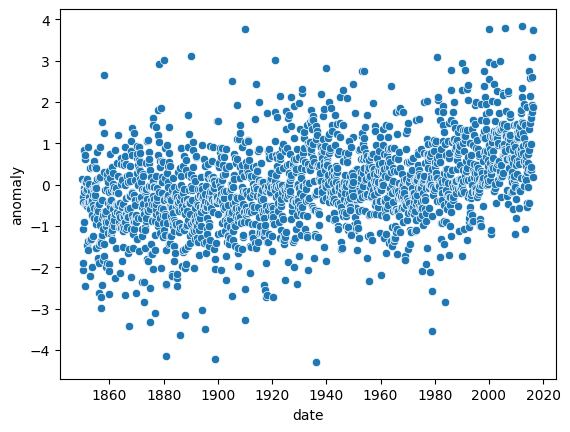

In [51]:
sns.scatterplot(temp,x="date",y="anomaly")

In [1]:
temp

NameError: name 'temp' is not defined

In [52]:
temp.to_csv("/Users/ishitajain/stocks-web-app/Spring-Invitation-Datathon-2024/clean_data/temp.csv")